In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from predict import *
from util import *



class Finder:
    def __init__(self, depth_sim, pos_sim, hint_sim):
        self.use_simple=True
        self.debug=False
        self.pos_sim = pos_sim
        self.hint_sim = hint_sim
        self.depth_sim = depth_sim
        if self.use_simple:
            self.nn = Nearest(depth_sim)
        
        pass
    
    def get_target2(self, vec, hint):
        ans = closest(vec=hint, mat=self.hint_sim, thresh=0.05)
        print(ans)
    
    def get_target(self, vec):
        if self.use_simple:
            pred, ans = nearest_predict(vec=vec
                                      ,mat=self.depth_sim
                                      ,pos=self.pos_sim)
        else:
            dist, ans = self.nn.findNeigh(depth_orig[i,:])
            pred = pos_sim[ans]
        if self.debug:
            vis_depth(depth_orig[i,:])
            vis_depth(depth_sim[ans,:])
        
        pred = pred.tolist()
        pred = pred[-3:]+pred[:3]
        return pred, self.depth_sim[ans]

if __name__=="__main__":
    sim_dir = 'large02/'
    depth_sim = np.load(os.path.join(sim_dir,'depth_sim_bg.npy'))
    hint_sim = np.load(os.path.join(sim_dir,'handles.npy'))[:,-6:]
    pos_sim = np.load(os.path.join(sim_dir,'expert.npy'))
    print("loaded",depth_sim.shape, pos_sim.shape, hint_sim.shape)
    finder = Finder(depth_sim, pos_sim, hint_sim)
    orig_dir = '22'
    depth_orig = np.load(os.path.join(orig_dir,'depth_orig.npy'))
    hint_orig = np.load(os.path.join(orig_dir,'robot_pos.npy'))
    # depth_sim = np.load('realtest/depth_sim_real.npy')
    # pos_sim = np.load('realtest/handles.npy')[:,-6:]
    ind = 0
    vec = depth_orig[ind,:]
    target, matched = finder.get_target(vec)
    vis_depth(vec)
    vis_depth(matched)
    print(target)
    



loaded (50000, 4096) (50000, 6) (50000, 6)


In [401]:

# depth_sim = np.load('realtest/depth_sim_real.npy')
# pos_sim = np.load('realtest/handles.npy')[:,-6:]

loaded (9749, 4096) (9749, 6) (9749, 6)


In [70]:
def closest(vec, mat,thresh):
    res = np.zeros(mat.shape[0])
    ans = []
    for i in range(mat.shape[0]):
        vec2 = mat[i,:]
        from numpy.linalg import norm
        dist1 = norm(vec[:3]-vec2[:3])
        dist2 = norm(vec[-3:]-vec2[-3:])
        #print(dist)
        if dist1<thresh and dist2<thresh:
            ans = ans + [i]
        
    return ans
def nearest_predict(vec,mat,pos):
    vec = vec.astype(int)
    mat = mat.astype(int)
    res = np.zeros(mat.shape[0])
    for i in range(mat.shape[0]):
        vec2= mat[i,:]
        dt = np.sum(abs(vec-vec2))
        res[i]=dt
    # find top answer's indices in mat
    ans = np.argsort(res)[:1]
#     for i in ans:
#         vis_depth(mat[i,:])
    return np.mean(pos[ans], axis=0), mat[ans[0]]

def find_target(depth, hint):
    hint = hint[-3:]+hint[:3]
    cands = closest(vec=hint, mat=hint_sim, thresh=0.1)
    print("cands",len(cands))
    if (len(cands)>0):
        pred, vec = nearest_predict(vec=depth, mat=depth_sim[cands], pos=pos_sim[cands])
        vis_depth(vec)
        pred = pred.tolist()
        pred = pred[-3:]+pred[:3]
        return pred
    print("no solution!")
    hint = hint[-3:]+hint[:3]
    return hint

import numpy as np
import os
from predict import *

orig_dir = './'
depth_orig = np.load(os.path.join(orig_dir,'depth_orig.npy'))
hint_orig = np.load(os.path.join(orig_dir,'robot_pos.npy'))


sim_dir = './large/'
depth_sim = np.load(os.path.join(sim_dir,'depth_sim_bg.npy'))
hint_sim = np.load(os.path.join(sim_dir,'handles.npy'))[:,-6:]
pos_sim = np.load(os.path.join(sim_dir,'expert.npy'))
print("loaded",depth_sim.shape, pos_sim.shape, hint_sim.shape)



import random
ind = random.randint(1,depth_orig.shape[0])
print(ind)
depth = depth_orig[ind,:]
hint = hint_orig[ind,:].tolist()
print("hint",hint)
print("target",find_target(depth,hint))

vis_depth(depth)


loaded (91453, 4096) (96989, 6) (96989, 6)
265
hint [0.3959171776507632, 0.16325318669111155, 0.4244216247668812, 0.39769332098919563, -0.09029751933569952, 0.4072728433183542]
cands 2017


IndexError: index 91758 is out of bounds for axis 0 with size 91453

In [71]:
print(depth_sim.shape)

(91453, 4096)


hint [0.3996940423020817, 0.16635190104844144, 0.403738022997919, 0.5182291753372449, -0.013122197165780475, 0.4043675849290318]
cands 7077


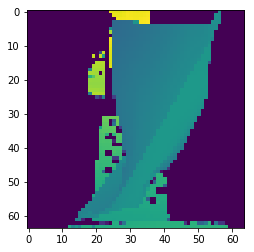

target [0.33675811561367847, -0.08097707134598789, 0.19252075653541437, 0.3424588169243836, -0.12167850719859752, 0.37972922475001336]


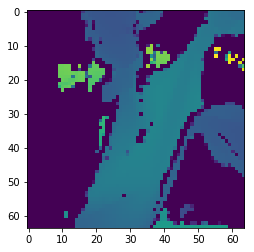

In [69]:
def find_target(depth, hint):
    hint = hint[-3:]+hint[:3]
    cands = closest(vec=hint, mat=hint_sim, thresh=0.1)
    print("cands",len(cands))
    if (len(cands)>0):
        pred, vec = nearest_predict(vec=depth, mat=depth_sim[cands], pos=pos_sim[cands])
        vis_depth(vec)
        pred = pred.tolist()
        pred = pred[-3:]+pred[:3]
        return pred
    print("no solution!")
    hint = hint[-3:]+hint[:3]
    return hint


import random
print
ind = random.randint(1,depth_orig.shape[0])
depth = depth_orig[ind,:]
hint = hint_orig[ind,:].tolist()
print("hint",hint)
print("target",find_target(depth,hint))

vis_depth(depth)


In [143]:
import random
ind = random.randint(1,depth_orig.shape[0])
vec = depth_orig[ind,:]
target, matched = finder.get_target(vec)
print(target)
vis_depth(vec)
vis_depth(matched)

IndexError: index 7882 is out of bounds for axis 0 with size 4500